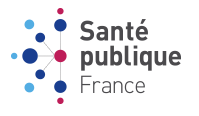

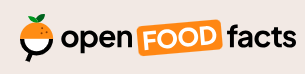

In [1]:
# !pip install --upgrade pandas

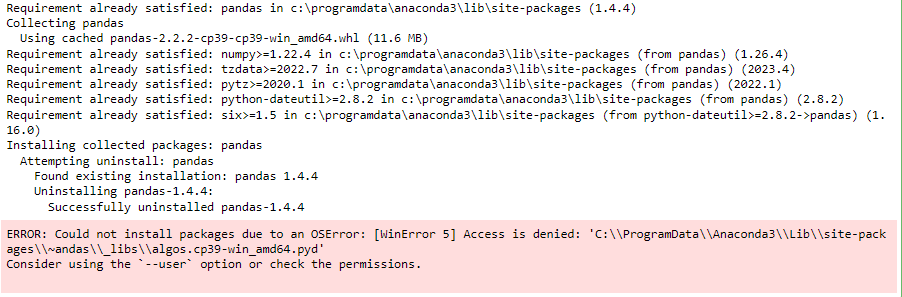

In [2]:
# !pip install --user --upgrade pandas

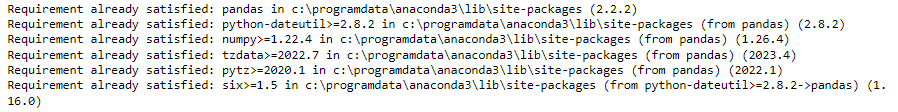

In [3]:
# !pip install numexpr --upgrade --user

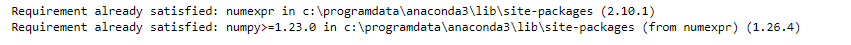

In [4]:
# !pip install bottleneck --upgrade --user

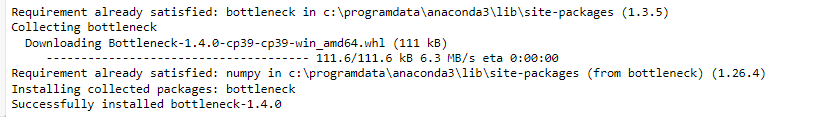

In [5]:
# add notebook summary
import jyquickhelper as jqh
from jyquickhelper import add_notebook_menu
add_notebook_menu(menu_id='OCDA_P3_N1_menu', raw=False, format='html',
                  header="NOTEBOOK 1 SUMMARY - Data import & cleaning", first_level=1, last_level=5, keep_item=None)

# Introduction - Load packages and check versions

In [46]:
# import librairies and functions needed for project
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys

from functions import *

# extract colors from school logo for ppt slideshow
ciel = findColor('light_blue.png')
cyan = findColor('dark_blue.png')
fuchsia = findColor('fuchsia.png')
zest = findColor('zest.png')
sap = findColor('pale_green.png')
leaf = findColor('dark_green.png')

print("ciel hex :",ciel)
print("cyan hex :",cyan)
print("fuchsia hex :",fuchsia)
print("zest hex :",zest)
print("pale green hex :",sap)
print("dark green hex :",leaf)

# set dataframe display options
pd.set_option('max_colwidth', None)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_columns', 200)
# pd.set_option('display.max_rows', 1000)
# pd.set_option('display.max_colwidth', -1)

ciel hex : #50ace2
cyan hex : #193e90
fuchsia hex : #be1b57
zest hex : #ff8c14
pale green hex : #00961e
dark green hex : #00641e


In [7]:
# check package versions
print("Packages versions : \n")
print("json -", json.__version__)
print("jyquickhelper -", jqh.__version__)
print("matplotlib -", mpl.__version__)
print("missingno -", msno.__version__)
print("numpy -", np.__version__)
print("pandas -", pd.__version__)
print("seaborn -", sns.__version__)
print("python -", sys.version[0:6])

Packages versions : 

json - 2.0.9
jyquickhelper - 0.4.220
matplotlib - 3.5.2
missingno - 0.4.1
numpy - 1.26.4
pandas - 2.2.2
seaborn - 0.13.2
python - 3.9.13


# 1. Import, describe & clean data

In [8]:
# food_facts = pd.read_csv("fr_openfoodfacts_org_products.csv", sep='\t', lineterminator='\r', on_bad_lines='warn')
# food_facts = pd.read_csv("fr_openfoodfacts_org_products.csv", sep='\t', lineterminator='\r')
# food_facts = pd.read_csv("fr_openfoodfacts_org_products.csv", sep='\t', lineterminator='\n', on_bad_lines='skip')

In [9]:
# %%time
# food_facts_chunks = pd.read_csv("fr_openfoodfacts_org_products.csv", sep='\t', low_memory=False, on_bad_lines='skip',
#                                 encoding='utf-8', chunksize=200000, skiprows = 1)
# food_facts = pd.concat(chunk for chunk in food_facts_chunks)

- None of the above read-csv methods achieves to import de data from the underlying csv file (time-out). Let us first check the file size :

In [10]:
# check file size
print("File size: {0:9.0f} MB".format(os.path.getsize("fr.openfoodfacts.org.products.csv")/1000000))

File size:       847 MB


In [11]:
# import the first 100,000 rows of the file to check column names and data types
food_facts_sample = pd.read_csv("fr.openfoodfacts.org.products.csv", lineterminator='\n', sep='\t', nrows=100000,
                                low_memory=False, on_bad_lines='skip')

In [12]:
# check a random sample of 100 lines from the first 100,000 lines
food_facts_sample.sample(axis=0, n=100)

code  \
77901  72030022307   
68429  70038339151   
98784  78742371085   
82961  73168709054   
77537  71828011172   
...            ...   
49740  41497277667   
1562   10389573057   
60296  49022836273   
51329  41500053097   
57679  45255143416   

                                                                                                                                                    url  \
77901                    http://world-fr.openfoodfacts.org/produit/0072030022307/little-bites-snackin-bites-soft-baked-mini-bars-strawberry-entenmann-s   
68429                                                              http://world-fr.openfoodfacts.org/produit/0070038339151/toaster-pastries-best-choice   
98784                                                            http://world-fr.openfoodfacts.org/produit/0078742371085/cherry-pie-filling-great-value   
82961                                                              http://world-fr.openfoodfacts.org/produit/0073168709054/frozen-16-cards-candy-disney   
77537                                                    http://world-fr.openfoodfacts.org/produit/0071828011172/extra-hot-sriracha-mustard-inglehoffer   
...                                                                                                                                                 ...   
49740                                                                 http://world-fr.openfoodfacts.org/produit/0041497277667/tomato-sauce-weis-quality   
1562   http://world-fr.openfoodfacts.org/produit/0010389573057/stuffed-fillets-with-shrimp-artichoke-seafood-and-spinach-quality-foods-from-the-sea-inc   
60296                                       http://world-fr.openfoodfacts.org/produit/0049022836273/smile-save-molasses-soft-baked-cookies-walgreens-co   
51329                                                     http://world-fr.openfoodfacts.org/produit/0041500053097/smoky-base-barbecue-sauce-cattlemen-s   
57679                                                       http://world-fr.openfoodfacts.org/produit/0045255143416/edamame-soybeans-in-shell-melissa-s   

               creator   created_t      created_datetime  last_modified_t  \
77901  usda-ndb-import  1489068116  2017-03-09T14:01:56Z       1489068116   
68429  usda-ndb-import  1489094312  2017-03-09T21:18:32Z       1489094312   
98784  date-limite-app  1436999727  2015-07-15T22:35:27Z       1489057030   
82961  usda-ndb-import  1489072550  2017-03-09T15:15:50Z       1489072550   
77537  usda-ndb-import  1489061319  2017-03-09T12:08:39Z       1489061319   
...                ...         ...                   ...              ...   
49740  usda-ndb-import  1489051873  2017-03-09T09:31:13Z       1489051873   
1562   usda-ndb-import  1489093701  2017-03-09T21:08:21Z       1489093701   
60296  usda-ndb-import  1489076172  2017-03-09T16:16:12Z       1489076172   
51329  usda-ndb-import  1489094538  2017-03-09T21:22:18Z       1489094539   
57679  usda-ndb-import  1489057477  2017-03-09T11:04:37Z       1489057477   

      last_modified_datetime  \
77901   2017-03-09T14:01:56Z   
68429   2017-03-09T21:18:32Z   
98784   2017-03-09T10:57:10Z   
82961   2017-03-09T15:15:50Z   
77537   2017-03-09T12:08:39Z   
...                      ...   
49740   2017-03-09T09:31:13Z   
1562    2017-03-09T21:08:21Z   
60296   2017-03-09T16:16:12Z   
51329   2017-03-09T21:22:19Z   
57679   2017-03-09T11:04:37Z   

                                                         product_name  \
77901  Little Bites, Snackin' Bites, Soft-Baked Mini Bars, Strawberry   
68429                                                Toaster Pastries   
98784                                              Cherry Pie Filling   
82961                                        Frozen, 16 Cards & Candy   
77537                                      Extra Hot Sriracha Mustard   
...                                                               ...   
49740                                                    Tomato Sau

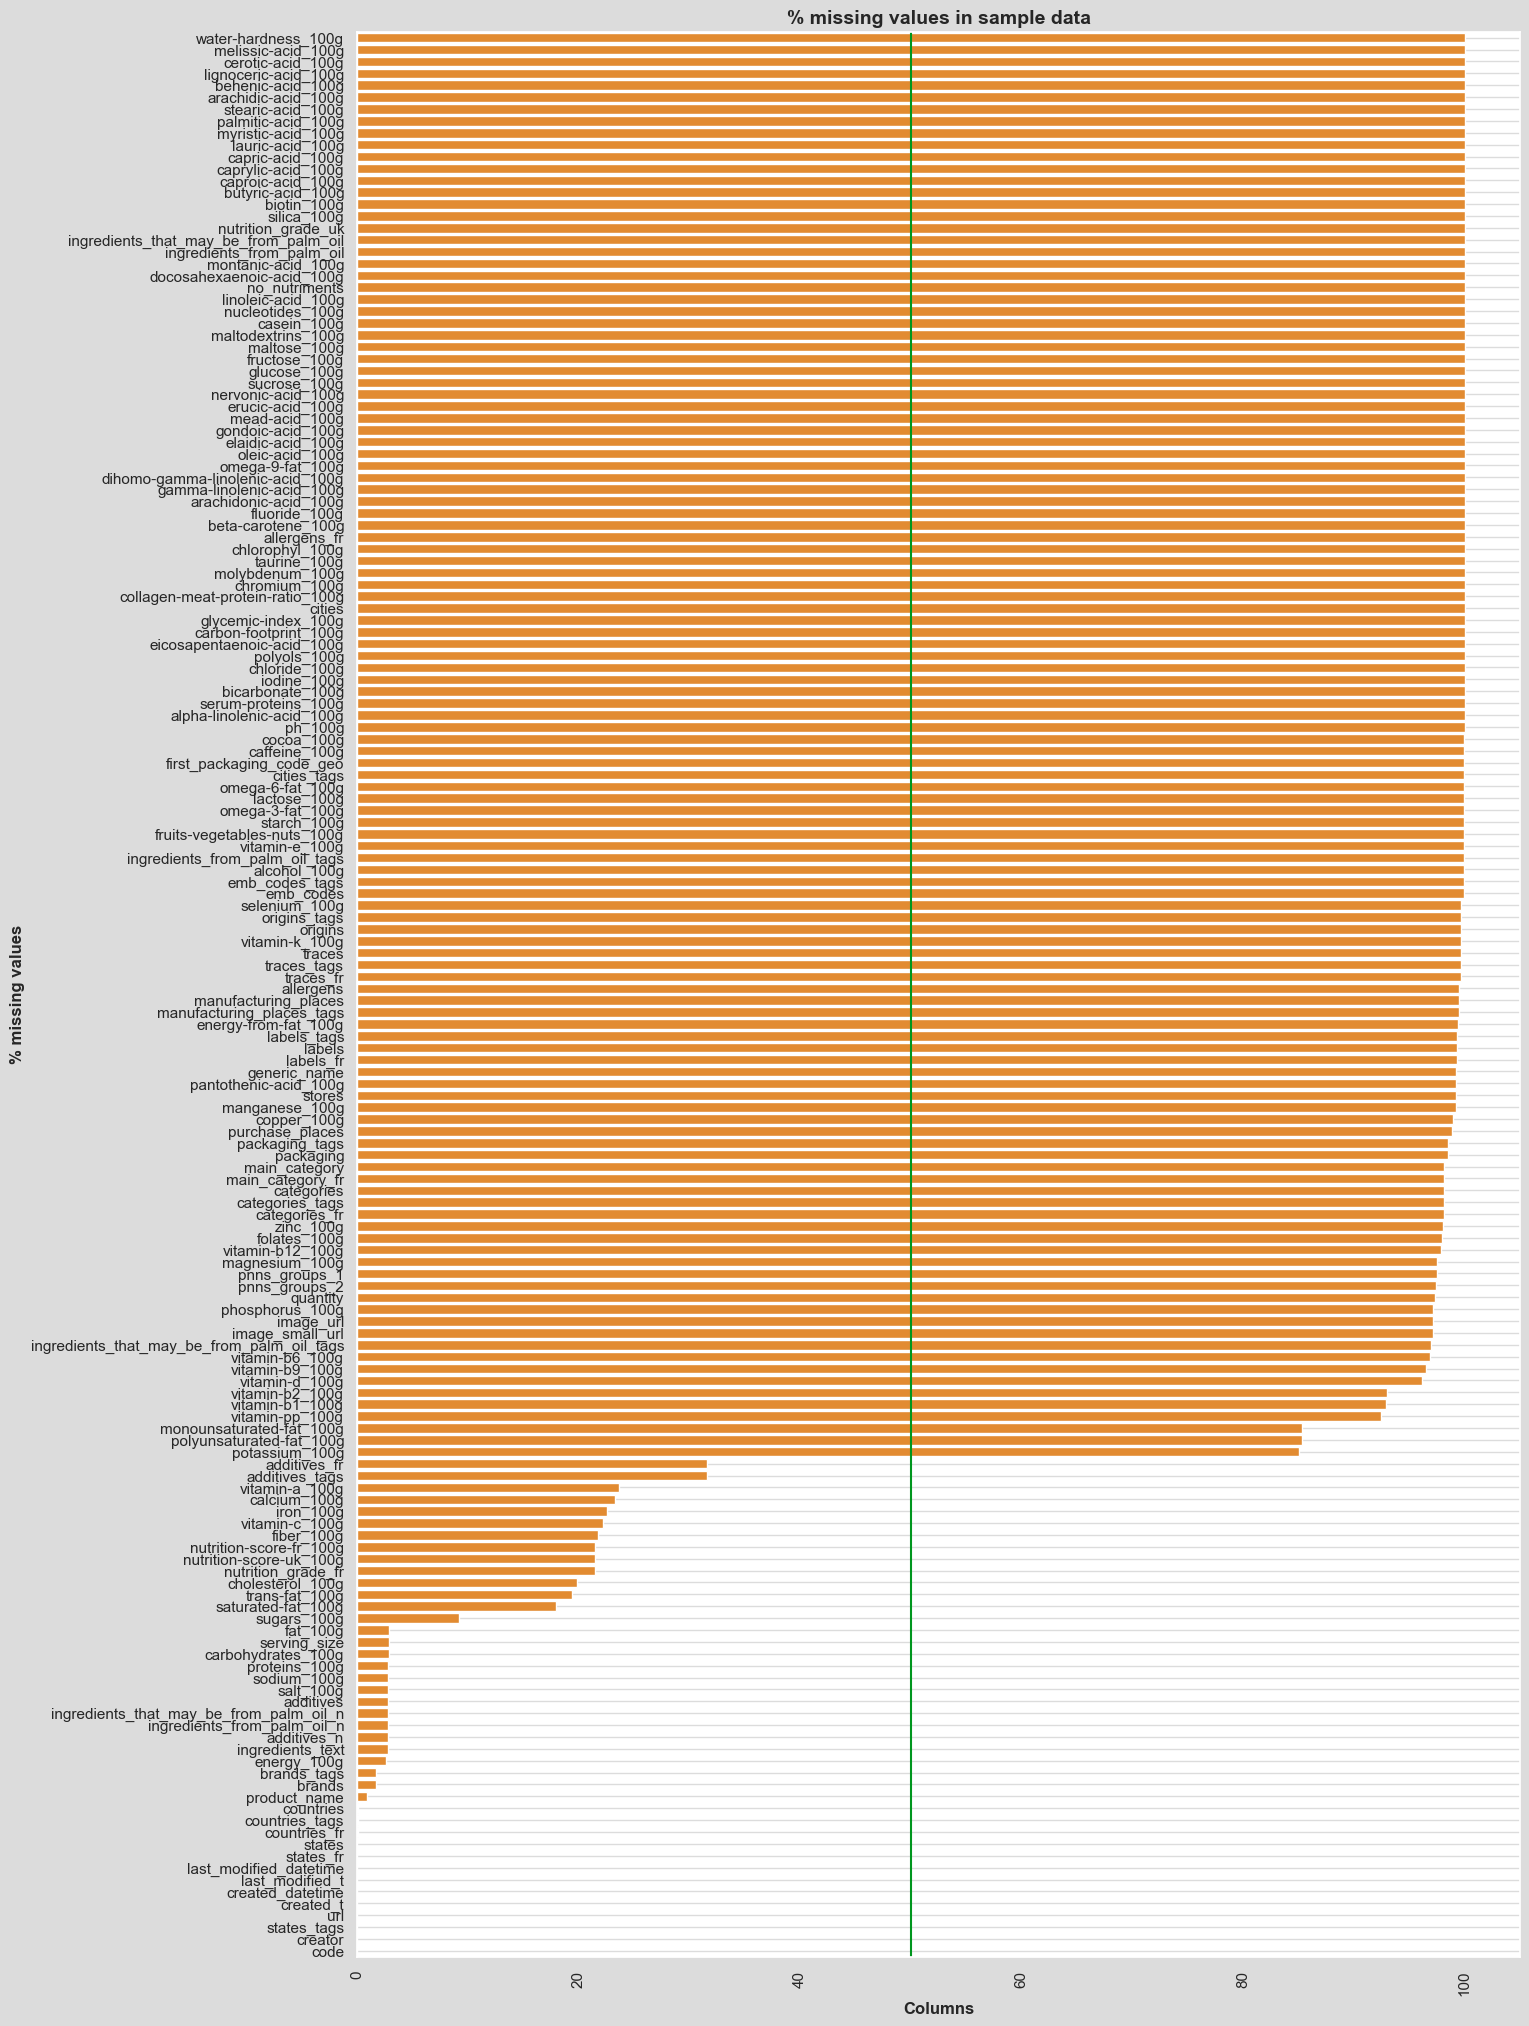

In [13]:
# plot % of missing values in sample data
food_facts_sample_nulls = pd.DataFrame(food_facts_sample.isnull().mean() * 100).sort_values(by=[0],
                                                                                            ascending=False).reset_index()
food_facts_sample_nulls.rename(columns={'index': 'Column', 0: '% missing values'}, inplace = True)
sns.set(rc={'figure.figsize':(15, 25), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph_0 = sns.barplot(data = food_facts_sample_nulls, x='% missing values', y='Column', color=zest)
plt.axvline(50, color=sap)
plt.title('% missing values in sample data', fontweight='bold', fontsize='14')
plt.xlabel('Columns', fontweight='bold', fontsize='12')
plt.xticks(rotation=90)
plt.ylabel('% missing values', fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.savefig("graph_0.png", bbox_inches='tight')

In [14]:
# create random sample with size n=500 from sample data for further analysis
sample_500 = food_facts_sample.sample(axis=0, n=500)
sample_500.to_csv('sample_500.csv', index=False, encoding='utf-8')

In [15]:
# check columns
food_facts_sample.columns.tolist()

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'packaging_tags',
 'brands',
 'brands_tags',
 'categories',
 'categories_tags',
 'categories_fr',
 'origins',
 'origins_tags',
 'manufacturing_places',
 'manufacturing_places_tags',
 'labels',
 'labels_tags',
 'labels_fr',
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 'cities',
 'cities_tags',
 'purchase_places',
 'stores',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr',
 'serving_size',
 'no_nutriments',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutritio

- Based on the column headers above and the list of fields available at https://world.openfoodfacts.org/data/data-fields.txt, and in order to minimize memory usage during csv file import, a dictionary of data types was created and stored in a json format.

- Columns suffixed with "_tags", "_text", "_fr" (except 'nutrition_grade_fr'), "_url", as well as all the general information on the product (except the name and code) and the columns that contain multiple values ("states" and "additives") are unlikely to assist our analysis and should be removed to speed up the import and avoid a time-out.

In [16]:
cols_keep_init = ['code','product_name','generic_name','quantity','packaging', 'brands', 'categories', 'origins', 
             'manufacturing_places', 'labels',  'emb_codes', 'first_packaging_code_geo', 'cities', 'purchase_places',
             'stores', 'countries', 'allergens', 'traces', 'serving_size', 'no_nutriments', 'additives_n',  
             'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil', 
             'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil', 'nutrition_grade_uk',
             'pnns_groups_1', 'pnns_groups_2', 'main_category',  'energy_100g', 'nutrition_grade_fr',  'nutrition-score-fr_100g',
             'nutrition_grade_uk', 'nutrition-score-uk_100g',
             'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g', 'butyric-acid_100g',
             'caproic-acid_100g', 'caprylic-acid_100g', 'capric-acid_100g', 'lauric-acid_100g', 'myristic-acid_100g',
             'palmitic-acid_100g', 'stearic-acid_100g', 'arachidic-acid_100g', 'behenic-acid_100g', 'lignoceric-acid_100g',
             'cerotic-acid_100g', 'montanic-acid_100g', 'melissic-acid_100g', 'monounsaturated-fat_100g',
             'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'alpha-linolenic-acid_100g', 'eicosapentaenoic-acid_100g',
             'docosahexaenoic-acid_100g', 'omega-6-fat_100g', 'linoleic-acid_100g', 'arachidonic-acid_100g',
             'gamma-linolenic-acid_100g', 'dihomo-gamma-linolenic-acid_100g', 'omega-9-fat_100g', 'oleic-acid_100g',
             'elaidic-acid_100g', 'gondoic-acid_100g', 'mead-acid_100g', 'erucic-acid_100g', 'nervonic-acid_100g',
             'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'sucrose_100g', 'glucose_100g',
             'fructose_100g', 'lactose_100g', 'maltose_100g', 'maltodextrins_100g', 'starch_100g', 'polyols_100g', 'fiber_100g',
             'proteins_100g', 'casein_100g', 'serum-proteins_100g', 'nucleotides_100g', 'salt_100g', 'sodium_100g',
             'alcohol_100g', 'vitamin-a_100g', 'beta-carotene_100g', 'vitamin-d_100g', 'vitamin-e_100g', 'vitamin-k_100g',
             'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'vitamin-b9_100g',
             'folates_100g', 'vitamin-b12_100g', 'biotin_100g', 'pantothenic-acid_100g', 'silica_100g', 'bicarbonate_100g',
             'potassium_100g', 'chloride_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'zinc_100g',
             'copper_100g', 'manganese_100g', 'fluoride_100g', 'selenium_100g', 'chromium_100g', 'molybdenum_100g',
             'iodine_100g', 'caffeine_100g', 'taurine_100g', 'ph_100g', 'fruits-vegetables-nuts_100g',
             'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g', 'carbon-footprint_100g',
             'nutrition-score-fr_100g', 'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g']

In [17]:
# load data types dictionary
data_types = 'data_types.json'
with open(data_types, 'r') as source_file:
    data_types_dict = json.load(source_file)

In [18]:
%%time
# load data using data types dictionary and filtered list of columns
# NB : using on_bad_lines='warn' instead of on_bad_lines='skip' returns only 23 "bad" lines with no product code => skip OK
data = pd.read_csv("fr.openfoodfacts.org.products.csv", sep='\t', low_memory=False, on_bad_lines='skip', usecols=cols_keep_init,
                         dtype=data_types_dict, lineterminator='\n')
food_facts = data.copy()
food_facts.shape

Wall time: 1min 1s


(320749, 129)

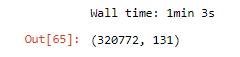

In [19]:
food_facts.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320749 entries, 0 to 320748
Columns: 129 entries, code to water-hardness_100g
dtypes: float64(99), object(30)
memory usage: 661.4 MB


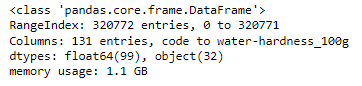

In [20]:
food_facts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320749 entries, 0 to 320748
Columns: 129 entries, code to water-hardness_100g
dtypes: float64(99), object(30)
memory usage: 315.7+ MB


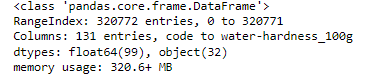

- Pre-assigning data types and filtering out irrelevant columns reduced the file load memory usage from 847MB to just over 300MB.

In [21]:
food_facts.sample(axis=0, n=100)

code                                          product_name  \
185792  2678477009987                                 Salsichon IB Joselito   
319112  9300639602936                          Liddells lactose free cheese   
65664   0054400000047                                       Sauce, Original   
232886  3436590082091                      Halal' Pocket Bolognaise surgelé   
3923    0011110853301                              Original Instant Oatmeal   
...               ...                                                   ...   
222471  3281780886467  Salades Portions Carottes Rapées & Taboulé Oriental    
7558    0011213019376                          Extra Creamy Whipped Topping   
143679  0766694301471                              Gingered Carrot Soup Mix   
155124  0833949000110                                    Sirop d'érable pur   
211996  3257980017758                                       Sirop d'orange    

                                                                                                  generic_name  \
185792                                                                                                     NaN   
319112                                                                                                     NaN   
65664                                                                                                      NaN   
232886  Pizza sandwich garnie d'une préparation de viandes de boeuf et de dinde halal, de mozzarella et d'édam   
3923                                                                                                       NaN   
...                                                                                                        ...   
222471                                                                    Carottes rapées et taboulé oriental    
7558                                                                                                       NaN   
143679                                                                                                     NaN   
155124                                                                                                     NaN   
211996                                                                                                     NaN   

                 quantity  \
185792                NaN   
319112               250g   
65664                 NaN   
232886  2 * 130 g (260 g)   
3923                  NaN   
...                   ...   
222471              480 g   
7558                  NaN   
143679                NaN   
155124             540 ml   
211996              75 cl   

                                                      packaging  \
185792                                                      NaN   
319112                                                  Plastic   
65664                                                       NaN   
232886                                           Carton,Surgelé   
3923                                                        NaN   
...                                                         ...   
222471  Frais,Plastique,Barquette,Carton,Atmosphère protectrice   
7558                                                        NaN   
143679                                                      NaN   
155124                                                      NaN   
211996                            Bidon,Métal,Bouchon,Plastique   

                  brands  \
185792               NaN   
319112           Liddels   
65664                A.1   
232886  Oriental Viandes   
3923              Kroger   
...                  ...   
222471   Pierre Martinet   
7558             Spartan   
143679    Frontier Soups   
155124               NaN   
211996              Cora   

                                                                                                                                                                                                                

In [22]:
food_facts.describe(include=[object])

code product_name  \
count          320749       302987   
unique         320749       221343   
top     0000000003087    Ice Cream   
freq                1          410   

                                               generic_name quantity  \
count                                                 52773   104800   
unique                                                38562    13816   
top     Pâtes alimentaires au blé dur de qualité supérieure    500 g   
freq                                                    201     4669   

       packaging     brands                                  categories  \
count      78960     292360                                       84389   
unique     14547      58784                                       36976   
top       Carton  Carrefour  Snacks sucrés,Biscuits et gâteaux,Biscuits   
freq        2153       2978                                         301   

       origins manufacturing_places  \
count    22168                36479   
unique    4818                 7288   
top     France               France   
freq      5171                 9371   

                                                   labels   emb_codes  \
count                                               46559       29306   
unique                                              18114        8462   
top     Organic, EU Organic, fr:AB Agriculture Biologique  EMB 56251E   
freq                                                 3223         218   

       first_packaging_code_geo cities purchase_places     stores countries  \
count                     18803      0           58190      51714    320492   
unique                     1602      0            5120       3255      1428   
top         47.633333,-2.666667    NaN          France  Carrefour        US   
freq                        279    NaN           11768       6466    169928   

       allergens          traces      serving_size no_nutriments additives_n  \
count      28344           24330            211329             0      248961   
unique     12921            8361             25418             0          31   
top          blé  Fruits à coque  240 ml (8 fl oz)           NaN           0   
freq        1279            1240              5496           NaN       94259   

       ingredients_from_palm_oil_n ingredients_from_palm_oil  \
count                       248961                         0   
unique                           3                         0   
top                              0                       NaN   
freq                        244126                       NaN   

       ingredients_that_may_be_from_palm_oil_n  \
count                                   248961   
unique                                       7   
top                                          0   
freq                                    237264   

       ingredients_that_may_be_from_palm_oil nutrition_grade_uk  \
count                                      0                  0   
unique                                     0                  0   
top                                      NaN                NaN   
freq                                     NaN                NaN   

       nutrition_grade_fr pnns_groups_1 pnns_groups_2 main_category  
count              221233         91536         94514         84389  
unique                  5            14            42          3543  
top                     d       unknown       unknown  en:beverages  
freq                62763         22626         22626          6054

In [23]:
# %%time
# msno.matrix(food_facts)

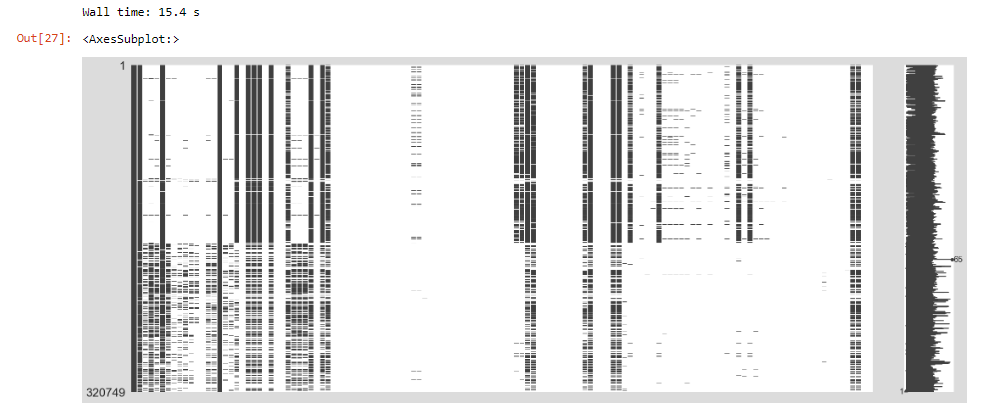

In [24]:
%%time
# calculate % of nulls in entire dataframe
food_facts_nulls_pct = food_facts.isna().sum().sum() / (food_facts.shape[0]*food_facts.shape[1]/100)
print(round(food_facts_nulls_pct,2), '% missing values in dataframe')

83.13 % missing values in dataframe
Wall time: 405 ms


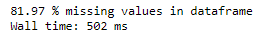

In [25]:
# find columns that contain only NANs
nulls = food_facts.isnull().all().reset_index()
nulls_cols = nulls.loc[nulls[0] == True]
nulls_cols_list = nulls_cols['index'].tolist()
print(len(nulls_cols_list), "columns contain only NaNs:")
nulls_cols_list

20 columns contain only NaNs:


['cities',
 'no_nutriments',
 'ingredients_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil',
 'nutrition_grade_uk',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'behenic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'melissic-acid_100g',
 'dihomo-gamma-linolenic-acid_100g',
 'elaidic-acid_100g',
 'gondoic-acid_100g',
 'mead-acid_100g',
 'erucic-acid_100g',
 'nervonic-acid_100g',
 'chlorophyl_100g',
 'glycemic-index_100g',
 'water-hardness_100g']

In [26]:
# remove columns containing only NaNs
food_facts.dropna(axis=1, how='all', inplace=True)
food_facts.shape

(320749, 109)

In [27]:
# check for duplicates
food_facts_dup = food_facts.loc[food_facts.duplicated() == True]
food_facts_dup.shape[0]

0

# 2. Select relevant columns

- The data does not contain any duplicates. According to the list of fields available at https://world.openfoodfacts.org/data/data-fields.txt, the ['Code'] columns should be a unique identifier for products, as it is derived from the product bar code (or an assigned unique number if no bar code is available). Let us check if this column is indeed a candidate key for the dataframe:

In [28]:
isCandKey(food_facts, 'code')

code is a candidate primary key.


True

In [29]:
# locate duplicates in ['code'] column
dup_codes = food_facts.loc[food_facts.duplicated(subset=['code']) == True].reset_index()
dup_codes.shape

(0, 110)

- NB : removal of "bad" lines upon import also removed 23 duplicates in the ['code'] column (which were actually only missing codes due to malformed rows being shifted to the right). 

In [30]:
# remove rows with missing code
# also remove rows with missing product name, pnns_1 and pnns_2, as it will be impossible to infer plausible values for NaNs
# or outliers for these products without adequate category labelling
food_facts_trim = food_facts[(food_facts['code'].isna() == False) & (food_facts['product_name'].isna() == False)
                            & (food_facts['pnns_groups_1'].isna() == False) & (food_facts['pnns_groups_2'].isna() == False)]
food_facts_trim.shape

(88521, 109)

In [31]:
print(food_facts_trim['product_name'].isna().value_counts())
print(food_facts_trim['pnns_groups_1'].isna().value_counts())
print(food_facts_trim['pnns_groups_2'].isna().value_counts())

product_name
False    88521
Name: count, dtype: int64
pnns_groups_1
False    88521
Name: count, dtype: int64
pnns_groups_2
False    88521
Name: count, dtype: int64


In [32]:
print(food_facts_trim['product_name'].value_counts())
print(food_facts_trim['pnns_groups_1'].value_counts())
print(food_facts_trim['pnns_groups_2'].value_counts())

product_name
Huile d'olive vierge extra                    55
Spaghetti                                     51
Tomato Ketchup                                50
Coca-Cola                                     49
Orange                                        47
                                              ..
Gaufres fourrées pur beurre parfum vanille     1
Olives dénoyautées à l'ail                     1
Blanc de Poulet goût fumé                      1
Blanc de Dinde goût fumé                       1
乐吧泡菜味薯片                                        1
Name: count, Length: 72144, dtype: int64
pnns_groups_1
unknown                    20156
Sugary snacks              12267
Beverages                   8898
Milk and dairy products     8795
Cereals and potatoes        8376
Fish Meat Eggs              7984
Composite foods             6725
Fruits and vegetables       5870
Fat and sauces              5164
Salty snacks                2789
fruits-and-vegetables        986
sugary-snacks                4

In [33]:
# remove all lines where pnns_groups_1 or pnns_groups_2 is 'unknown'
food_facts_trim = food_facts_trim.loc[(food_facts_trim['pnns_groups_1'] != 'unknown') 
                                      |(food_facts_trim['pnns_groups_2'] != 'unknown')]
food_facts_trim.shape

(68365, 109)

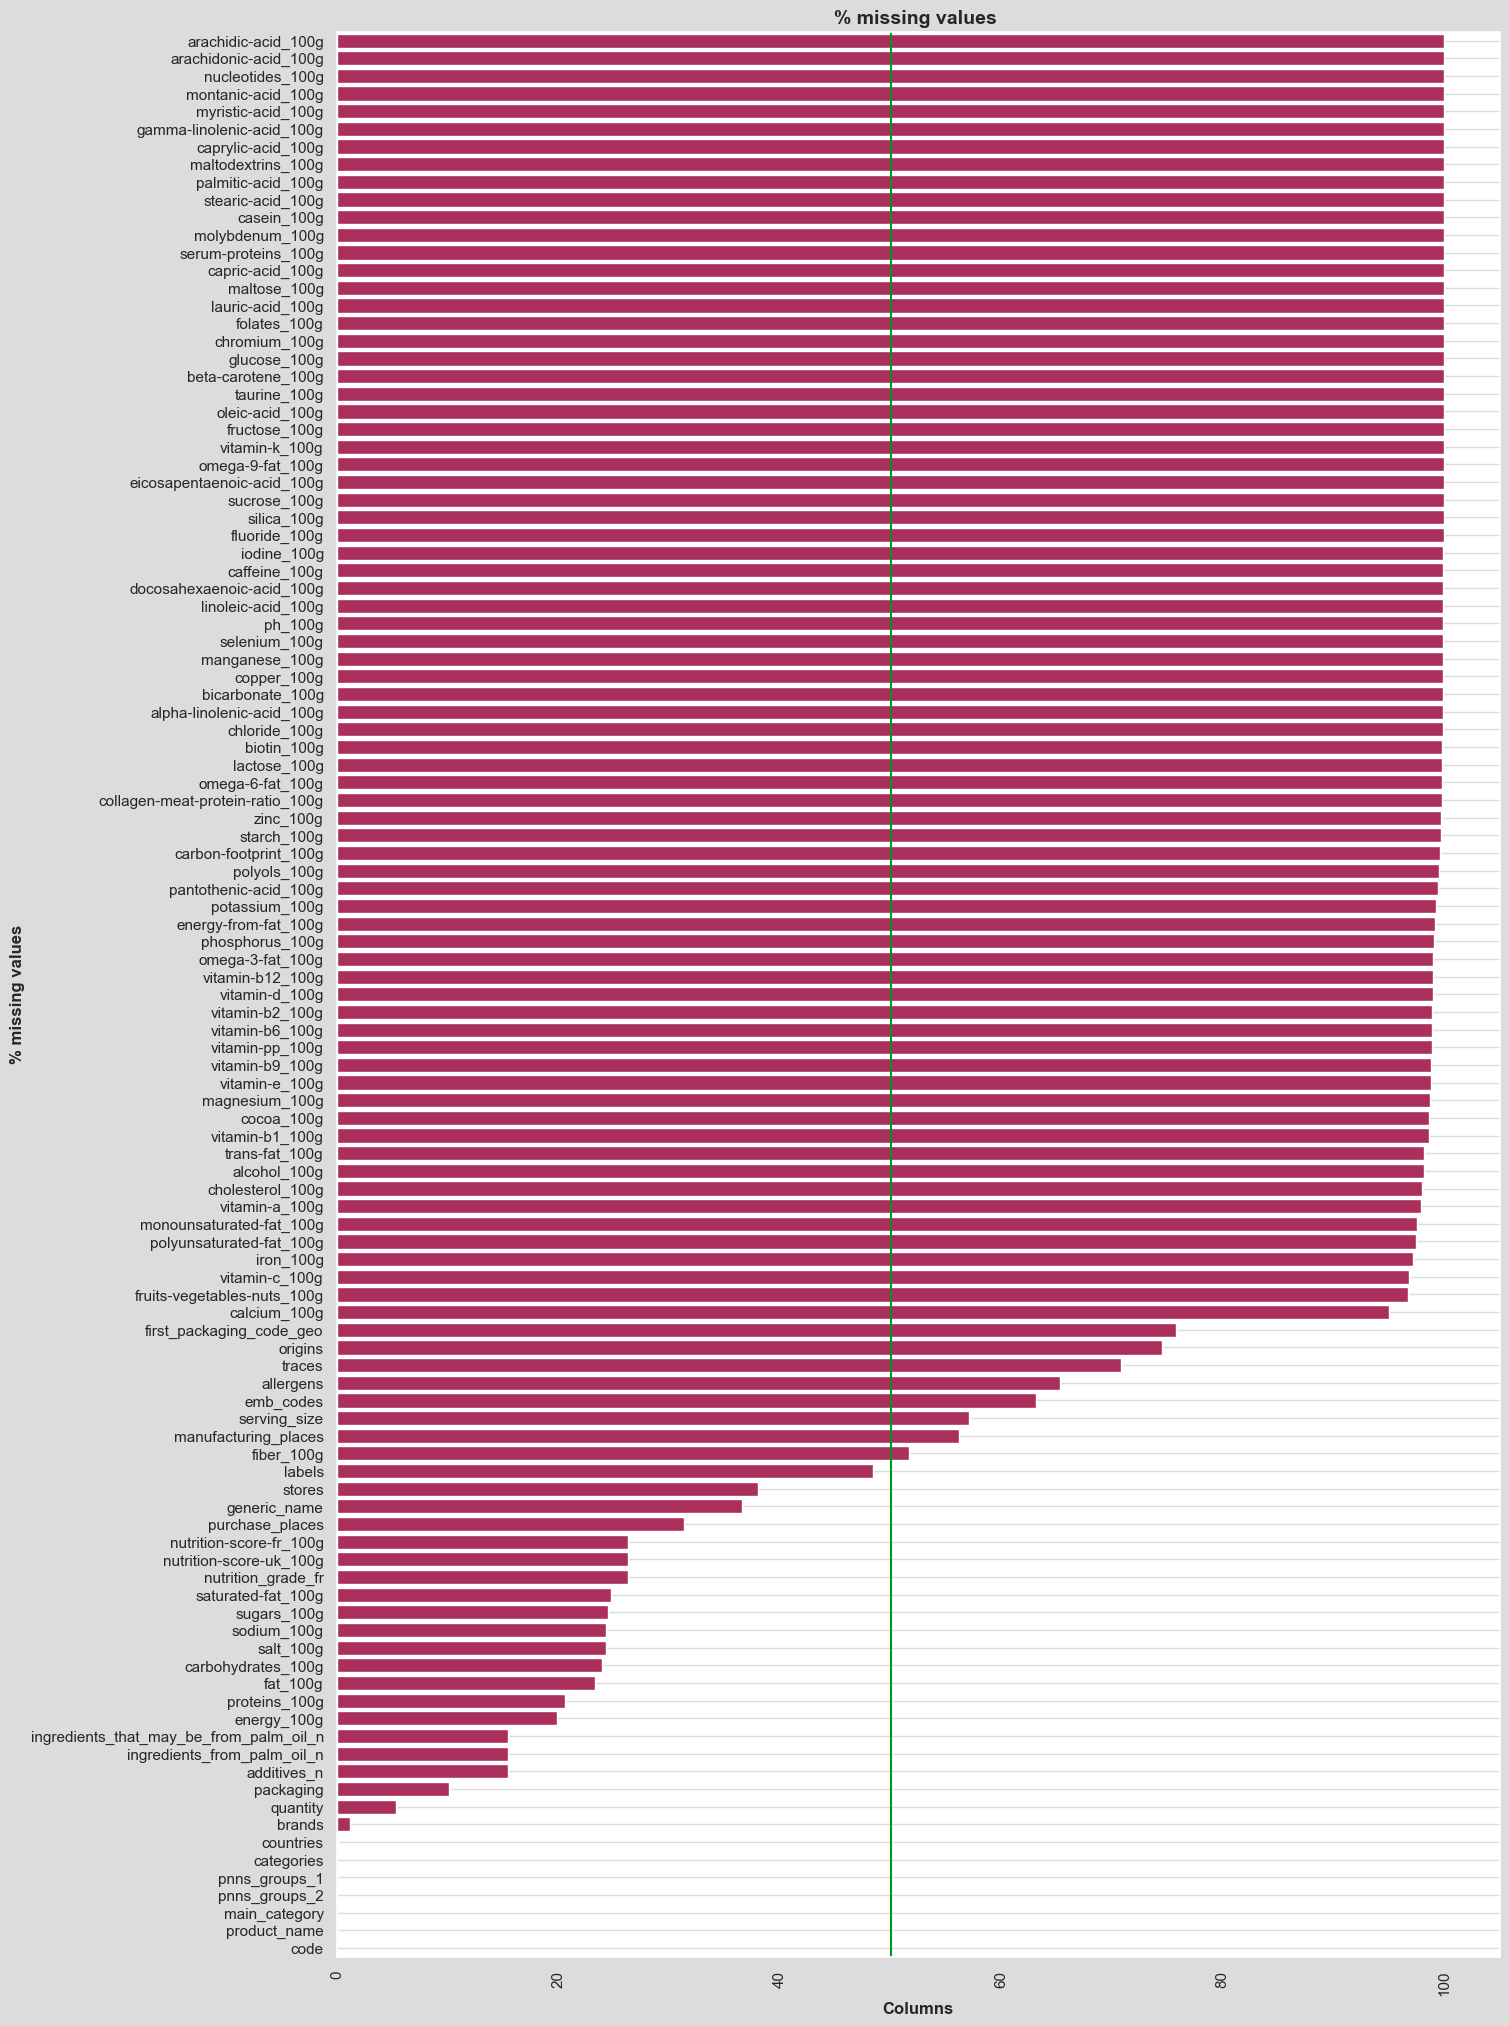

In [34]:
# plot % of missing values
food_facts_trim_nulls = pd.DataFrame(food_facts_trim.isnull().mean() * 100).sort_values(by=[0], ascending=False).reset_index()
food_facts_trim_nulls.rename(columns={'index': 'Column', 0: '% missing values'}, inplace = True)
sns.set(rc={'figure.figsize':(15, 25), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph_1 = sns.barplot(data = food_facts_trim_nulls, x='% missing values', y='Column', color=fuchsia)
plt.axvline(50, color=sap)
plt.title('% missing values ', fontweight='bold', fontsize='14')
plt.xlabel('Columns', fontweight='bold', fontsize='12')
plt.xticks(rotation=90)
plt.ylabel('% missing values', fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.savefig("graph_init.png", bbox_inches='tight')

- About 2/3rds of columns are more than 80% empty.

In [35]:
food_facts_trim.columns.tolist()

['code',
 'product_name',
 'generic_name',
 'quantity',
 'packaging',
 'brands',
 'categories',
 'origins',
 'manufacturing_places',
 'labels',
 'emb_codes',
 'first_packaging_code_geo',
 'purchase_places',
 'stores',
 'countries',
 'allergens',
 'traces',
 'serving_size',
 'additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'main_category',
 'energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 'caprylic-acid_100g',
 'capric-acid_100g',
 'lauric-acid_100g',
 'myristic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'arachidic-acid_100g',
 'montanic-acid_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 'alpha-linolenic-acid_100g',
 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 'linoleic-acid_100g',
 'arachidonic-acid_100g',
 'gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 'oleic-a

In [36]:
food_facts_trim['pnns_groups_1'].value_counts()

pnns_groups_1
Sugary snacks              12267
Beverages                   8898
Milk and dairy products     8795
Cereals and potatoes        8376
Fish Meat Eggs              7984
Composite foods             6725
Fruits and vegetables       5870
Fat and sauces              5164
Salty snacks                2789
fruits-and-vegetables        986
sugary-snacks                494
cereals-and-potatoes          16
salty-snacks                   1
Name: count, dtype: int64

In [37]:
# replace irregularly labelled values in pnns_groups_1 column
food_facts_trim.replace({'pnns_groups_1' : {'sugary-snacks':'Sugary snacks', 'cereals-and-potatoes':'Cereals and potatoes',
                  'fruits-and-vegetables':'Fruits and vegetables', 'salty-snacks':'Salty snacks'}}, regex=True, inplace=True)
food_facts_trim['pnns_groups_1'].value_counts()

pnns_groups_1
Sugary snacks              12761
Beverages                   8898
Milk and dairy products     8795
Cereals and potatoes        8392
Fish Meat Eggs              7984
Fruits and vegetables       6856
Composite foods             6725
Fat and sauces              5164
Salty snacks                2790
Name: count, dtype: int64

In [38]:
food_facts_trim['pnns_groups_2'].value_counts()

pnns_groups_2
One-dish meals                      5537
Sweets                              4651
Biscuits and cakes                  4538
Non-sugared beverages               4209
Cereals                             4082
Cheese                              4006
Dressings and sauces                3561
Milk and yogurt                     3292
Processed meat                      3232
Chocolate products                  3078
Vegetables                          2825
Fish and seafood                    2619
Sweetened beverages                 2152
Appetizers                          2086
Fruits                              2053
Fruit juices                        1904
Bread                               1815
Meat                                1678
Fats                                1603
Breakfast cereals                   1403
vegetables                           933
Legumes                              913
Dairy desserts                       780
Ice cream                            717
Nu

In [39]:
# replace irregularly labelled values in pnns_groups_1 column
food_facts_trim.replace({'pnns_groups_2' : {'vegetables':'Vegetables', 'legumes':'Legumes',
                  'fruits':'Fruits', 'cereals':'Cereals', 'nuts':'Nuts', 'pastries':'Pastries'}}, regex=True, inplace=True)
food_facts_trim['pnns_groups_2'].value_counts()

pnns_groups_2
One-dish meals                      5537
Sweets                              4651
Biscuits and cakes                  4538
Non-sugared beverages               4209
Cereals                             4094
Cheese                              4006
Vegetables                          3758
Dressings and sauces                3561
Milk and yogurt                     3292
Processed meat                      3232
Chocolate products                  3078
Fish and seafood                    2619
Sweetened beverages                 2152
Fruits                              2106
Appetizers                          2086
Fruit juices                        1904
Bread                               1815
Meat                                1678
Fats                                1603
Breakfast Cereals                   1403
Legumes                              917
Dairy desserts                       780
Ice cream                            717
Nuts                                 685
Sa

In [40]:
food_facts_trim.groupby('pnns_groups_1')['pnns_groups_2'].value_counts()

pnns_groups_1            pnns_groups_2                   
Beverages                Non-sugared beverages               4209
                         Sweetened beverages                 2152
                         Fruit juices                        1904
                         Fruit nectars                        373
                         Artificially sweetened beverages     260
Cereals and potatoes     Cereals                             4094
                         Bread                               1815
                         Breakfast Cereals                   1403
                         Legumes                              917
                         Potatoes                             163
Composite foods          One-dish meals                      5537
                         Sandwich                             680
                         Pizza pies and quiche                508
Fat and sauces           Dressings and sauces                3561
                  

- We will first reduce the dataset to columns that are filled at least as much as the fiber column.

In [41]:
cut_off = food_facts_trim_nulls.loc[food_facts_trim_nulls['Column'] == 'fiber_100g']['% missing values'].values[0]
cols_keep_final = food_facts_trim_nulls.loc[food_facts_trim_nulls['% missing values'] <= cut_off]['Column'].tolist()
cols_keep_final

['fiber_100g',
 'labels',
 'stores',
 'generic_name',
 'purchase_places',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g',
 'nutrition_grade_fr',
 'saturated-fat_100g',
 'sugars_100g',
 'sodium_100g',
 'salt_100g',
 'carbohydrates_100g',
 'fat_100g',
 'proteins_100g',
 'energy_100g',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_from_palm_oil_n',
 'additives_n',
 'packaging',
 'quantity',
 'brands',
 'countries',
 'categories',
 'pnns_groups_1',
 'pnns_groups_2',
 'main_category',
 'product_name',
 'code']

In [42]:
data_trim = food_facts_trim[cols_keep_final]
data_trim.shape

(68365, 29)

In [43]:
data_trim.head(60)

fiber_100g  \
174       2.000   
175       2.050   
177         NaN   
180       2.000   
182         NaN   
184         NaN   
185       0.357   
186         NaN   
188         NaN   
218         NaN   
223       4.700   
226       0.000   
236       1.800   
239         NaN   
240         NaN   
242       1.500   
259         NaN   
279       1.800   
283       1.500   
284         NaN   
299       1.700   
301       2.500   
360       0.000   
361       0.000   
362         NaN   
414         NaN   
415         NaN   
428       1.000   
454       1.300   
458       2.500   
459       3.300   
463       1.100   
468         NaN   
479       0.800   
494         NaN   
508       1.000   
525       0.752   
564       0.800   
568         NaN   
569       0.000   
579       0.505   
593         NaN   
595         NaN   
596         NaN   
628       3.100   
630       0.500   
635         NaN   
637       0.000   
648       0.500   
661         NaN   
662         NaN   
664       0.100   
666         NaN   
680       1.300   
685       2.900   
692         NaN   
695       0.800   
702       4.620   
731       6.670   
760         NaN   

                                                                                                                                  labels  \
174                                                                                                                                  NaN   
175                                                                                                                                  NaN   
177                                                                                                                                  NaN   
180                                                                                                                                  NaN   
182                                                                                                                                   AB   
184                                                                                                                           Point Vert   
185                                                                                                                                  NaN   
186                                                                                                                                  NaN   
188                                                                                                                                  NaN   
218                                                                                                                  UTZ Certified Kakao   
223                                                                                                                                  NaN   
226                                                                                                                                  NaN   
236                                                                                                                                  NaN   
239                                                                                                                   Vegetariano,Vegano   
240                                                                                                                                  NaN   
242                                                                                                                                  NaN   
259                                                                                                                                  NaN   
279                                                                                                        Fabriqué en France,Point Vert   
283                                                                                                        Point Vert,Fabriqué en France   
284                                          

# 3. Export clean data for further analysis

In [44]:
# export clean df for further analyses
data_trim.to_csv('data_trim.csv', index=False, encoding='utf-8')
print("Clean data shape:", data_trim.shape[0],' lines x ', data_trim.shape[1],' columns')
print("% NULLs in clean data: ", round((data_trim.isnull().sum().sum() *100 )/ ( data_trim.shape[0]* data_trim.shape[1]),2))

Clean data shape: 68365  lines x  29  columns
% NULLs in clean data:  18.4


# 4. Data loading & cleaning function

In [45]:
path_file = "fr.openfoodfacts.org.products.csv"
load_food_data(path_file)

Clean data shape: 68365  lines x  29  columns
% NULLs in clean data:  18.4
Output file name : data_trim_auto.csv
